<a href="https://colab.research.google.com/github/deepu718/tensorflow_practice/blob/main/02_neural_network_multi_class_classifiction_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Working with a larger example (multiclass classifiction)

when you have more than two classes as an option, it's known as **multi-class classifcation**.
  * This means if you have 3 different classes, it's multi-class classifiction.
  * it also means if you have 100 differnet classes, its multi-class classification

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# show the first training example
print(f'Training sample:\n{train_data[0]}')
print(f'Training label:\n{train_labels[0]}')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

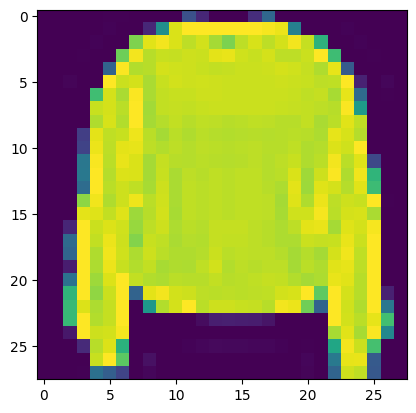

In [4]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [5]:
# Check out the samples label
train_labels[7]

2

In [6]:
# Create a small list so we can index onto our training labels so they are human readable
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

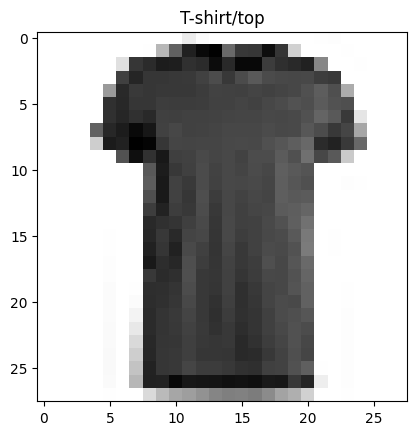

In [7]:
# plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

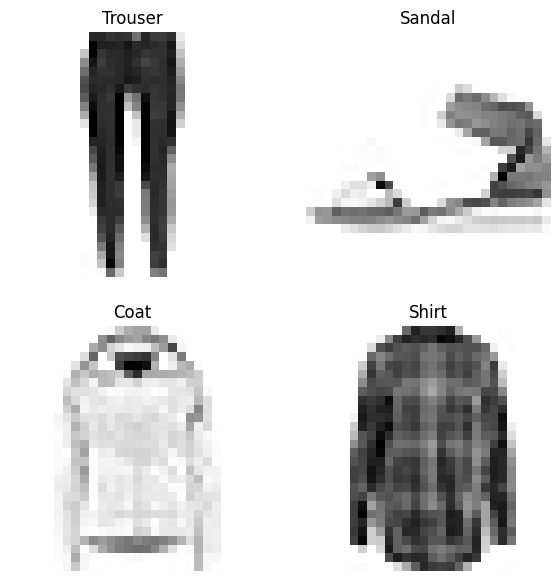

In [8]:
# plot multiple random images
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

for our multi-class classification model, we can use a similar architechture we can use a similar architechture to our binary classifiers, however we're going to have to tweak few things:
  * Input shape = 28 x 28(the shape of one image)
  * Output shape = 10(one per class of clothing)
  * Loss function = tf.keras.losses.CategoricalCrossentropy()
      * if your labels are one_hot encoded use CategoricalCrossentropy.
      * if your labels are integers use SparseCategoricalCrossentrpy
  * Output layer activation = Softmax

In [9]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
non_norm_history = model_1.fit(train_data,tf.one_hot(train_labels,depth=10),epochs=10,validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 2.0115 - accuracy: 0.2707 - val_loss: 1.4809 - val_accuracy: 0.3613
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3529 - accuracy: 0.4273 - val_loss: 1.2479 - val_accuracy: 0.4917
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2013 - accuracy: 0.4858 - val_loss: 1.1566 - val_accuracy: 0.5008
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.1236 - accuracy: 0.5098 - val_loss: 1.1032 - val_accuracy: 0.5423
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0631 - accuracy: 0.5460 - val_loss: 1.0568 - val_accuracy: 0.5836
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0192 - accuracy: 0.5832 - val_loss: 0.9965 - val_accuracy: 0.5893
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9876 - accuracy: 0.6017 - val_loss: 0.9929 - val_accuracy

In [10]:
# Check the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Check the min max values of the training data
train_data.min(),train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1

In [12]:
# we can get out training data and testing data between 0 & 1 by divdng by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [13]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
norm_history = model_2.fit(train_data_norm,
                               tf.one_hot(train_labels,depth=10),
                               epochs=10,
                               validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5723 - accuracy: 0.3986 - val_loss: 1.2055 - val_accuracy: 0.5553
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1091 - accuracy: 0.5800 - val_loss: 1.0447 - val_accuracy: 0.6091
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9685 - accuracy: 0.6396 - val_loss: 0.8800 - val_accuracy: 0.6928
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8083 - accuracy: 0.7153 - val_loss: 0.7896 - val_accuracy: 0.7201
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7535 - accuracy: 0.7324 - val_loss: 0.7719 - val_accuracy: 0.7253
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7249 - accuracy: 0.7412 - val_loss: 0.7826 - val_accuracy: 0.7156
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7074 - accuracy: 0.7455 - val_loss: 0.7242 - val_accuracy:

<Axes: title={'center': 'normalized data'}>

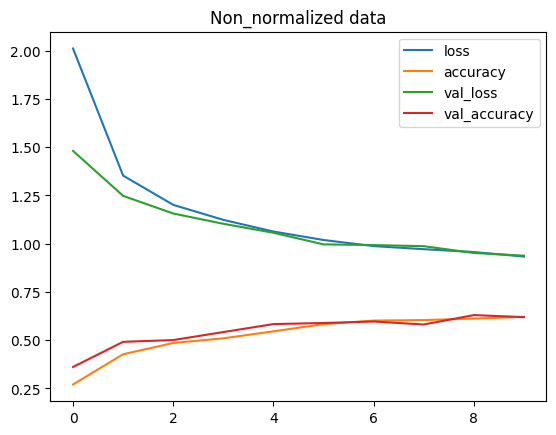

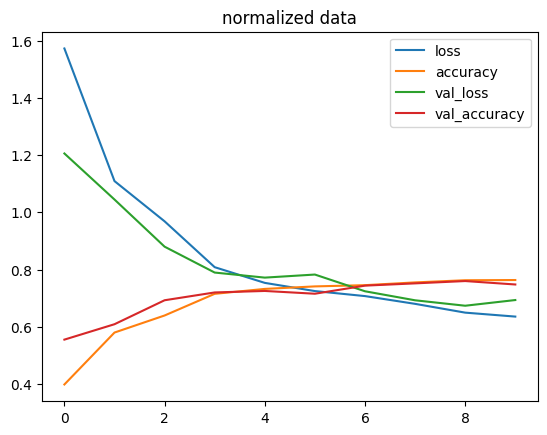

In [14]:
import pandas as pd
# plot the non norm data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non_normalized data")
pd.DataFrame(norm_history.history).plot(title="normalized data")


In [15]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# compile the model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Create the learing rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
# Fit the model
find_lr_history = model_3.fit(train_data_norm,
                               tf.one_hot(train_labels,depth=10),
                               epochs=40,
                               validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)),
                           callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2212 - accuracy: 0.5875 - val_loss: 0.8464 - val_accuracy: 0.7354 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7440 - accuracy: 0.7525 - val_loss: 0.7074 - val_accuracy: 0.7591 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6456 - accuracy: 0.7710 - val_loss: 0.6579 - val_accuracy: 0.7595 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6030 - accuracy: 0.7815 - val_loss: 0.6179 - val_accuracy: 0.7797 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5810 - accuracy: 0.7879 - val_loss: 0.6179 - val_accuracy: 0.7716 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5667 - accuracy: 0.7907 - val_loss: 0.5791 - val_accuracy: 0.7904 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

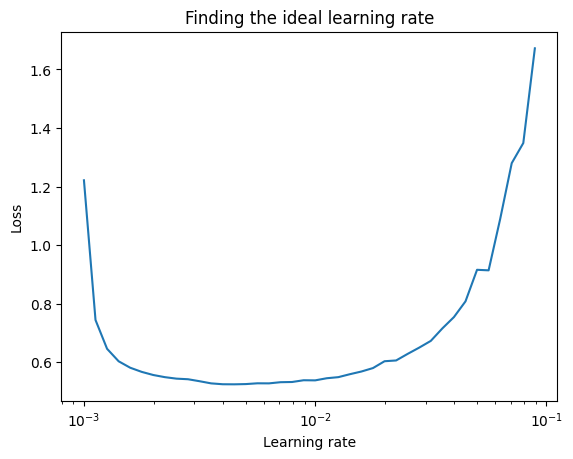

In [16]:
# PLot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [17]:
# Let's refit a model with the ideal learing rate

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

# compile the model
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data_norm,
                               tf.one_hot(train_labels,depth=10),
                               epochs=20,
                               validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1829 - accuracy: 0.5952 - val_loss: 0.8949 - val_accuracy: 0.7212
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7825 - accuracy: 0.7530 - val_loss: 0.7454 - val_accuracy: 0.7631
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6757 - accuracy: 0.7774 - val_loss: 0.6809 - val_accuracy: 0.7690
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6268 - accuracy: 0.7890 - val_loss: 0.6449 - val_accuracy: 0.7790
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6046 - accuracy: 0.7952 - val_loss: 0.6378 - val_accuracy: 0.7832
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5901 - accuracy: 0.7983 - val_loss: 0.6276 - val_accuracy: 0.7895
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5777 - accuracy: 0.8024 - val_loss: 0.6530 - val_accuracy:

from tensorflow.python.util.dispatch import register_unary_elementwise_api
## Evaluating our multi class classification model

To evluate our multi class classification model we could:
* Evaluate its performance using other classification metrics.
* Asses some of the its predictions
* Improve its results
* Save and export it for later use

In [20]:
# Create aconfusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true,y_preds,classes=None,figsize = (10,10),text_size=15):
  # Create the confusion matrrix
  cm = confusion_matrix(y_true, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # create a matrix plot
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  if classes:
    labels=classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion matrix",
        xlabel="Predicted Label",
        ylabel="True label",
        xticks = np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
  # Set x-axis label to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)
  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size)

In [21]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [25]:
# Make some predictions with our model
y_probs = model_4.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[5.41782219e-06, 3.45441755e-08, 1.27229187e-05, 3.03283532e-09,
        5.10545883e-10, 8.76011848e-02, 8.47320578e-08, 2.82569826e-01,
        3.20808068e-02, 5.97729862e-01],
       [1.74237084e-05, 3.47627331e-12, 9.37960207e-01, 3.08857140e-09,
        4.18149447e-03, 3.71522574e-16, 3.55565883e-02, 1.09157466e-29,
        2.22841911e-02, 2.13880449e-23],
       [2.72308197e-03, 9.66475368e-01, 1.03280519e-03, 1.62465088e-02,
        8.31344165e-04, 1.47183426e-03, 1.46630593e-03, 7.42444536e-03,
        2.03359663e-03, 2.94618512e-04],
       [2.72308197e-03, 9.66475368e-01, 1.03280519e-03, 1.62465088e-02,
        8.31344165e-04, 1.47183426e-03, 1.46630593e-03, 7.42444536e-03,
        2.03359663e-03, 2.94618512e-04],
       [1.12503670e-01, 9.87005114e-05, 2.40028530e-01, 1.57891475e-02,
        3.10607255e-02, 4.96676336e-08, 5.94797432e-01, 6.94916968e-15,
        5.72162215e-03, 6.50076867e-11]], dtype=float32)

In [22]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)